D:\2017_working\gitrepos\ML_time_series_training


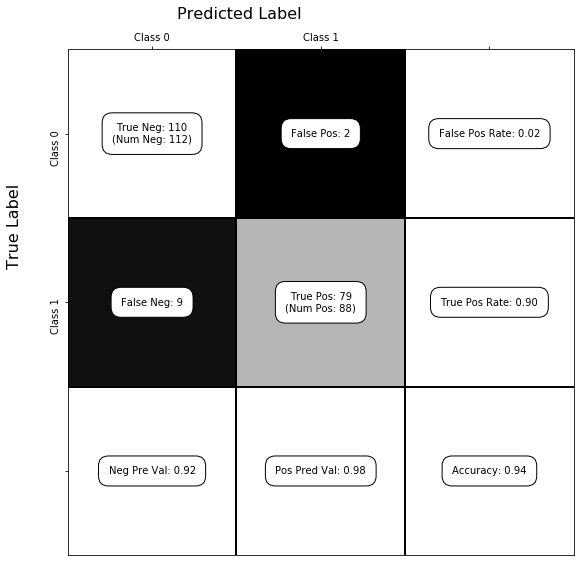

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from show_confusion_matrix import show_confusion_matrix
import os
print (os.getcwd())

#generate data
rs = np.random.RandomState(1234)
p = 2
n = 200
py1 = 0.6
mean1 = np.r_[1,1.]
mean0 = -mean1

# generate training data
Y = (rs.rand(n) > py1).astype(int)
X = np.zeros((n,p))
X[Y==0] = rs.multivariate_normal(mean0, np.eye(p), size=(Y==0).sum())
X[Y==1] = rs.multivariate_normal(mean1, np.eye(p), size=(Y==1).sum())

lr = LogisticRegression()
lr.fit(X,Y)

# generate test data
Y = (rs.rand(n) > py1).astype(int)
X = np.zeros((n,p))
X[Y==0] = rs.multivariate_normal(mean0, np.eye(p), size=(Y==0).sum())
X[Y==1] = rs.multivariate_normal(mean1, np.eye(p), size=(Y==1).sum())

#create confusion matrix & display.
C = confusion_matrix(Y,lr.predict(X))
show_confusion_matrix(C, ['Class 0', 'Class 1'])